$\textbf{DS165-L - DATA ANALYTICS LABORATORY} \\ \texttt{SY2425}$

NAME: MA. ADDINE ANNE T. CARREON
 
SECTION: AM14

***

<b> Use sales-data sheet from assignment-data.xlsx and do the following tasks: The Managing Director found that there is no clarity in sales-data. He likes to see clear visualization of data in various dimensions. He instructed his junior data scientist “Mr.Bean” to reshape the data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('assignment-data.xlsx', sheet_name='sales-data')

### Part 1
<b> Mr.Bean decided to display the product details produced by every company, along with supervisor detail.

In [3]:
pt_sd = pd.pivot_table(df, values='Price', 
                          index=['supervisor', 'company-name'], 
                          columns='Product-detail', 
                          aggfunc='sum', 
                          fill_value=0)
pt_sd.columns = pd.MultiIndex.from_product([['sum'], ['Price'], 
                                            pt_sd.columns])
pt_sd

sum                               
                              Price                               
Product-detail              Monitor Software printer search engine
supervisor     company-name                                       
David Anderson Adobe              0        0       0         23000
               Infosys         4000        0       0         69000
               Microsoft          0        0    5000             0
               Oracle             0        0       0         90000
               SAP                0        0       0         75000
               XYZ company        0     9000    3000             0
Peter Prince   ABC ltd            0        0       0         25000
               Apple              0    20000    6000         40000
               Facebook           0        0       0         54000
               Google             0        0       0         45000
               HCL                0    12000    8000         43000

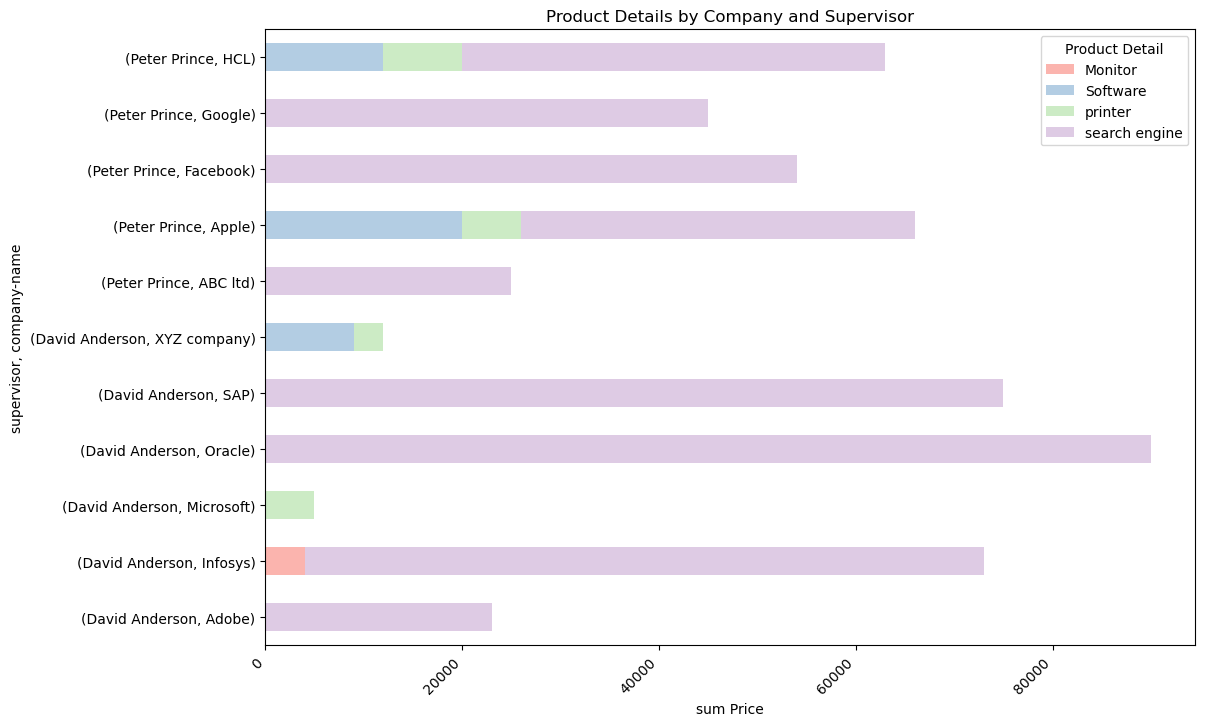

In [4]:
pastel_colors = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc']

pt_sd.plot(kind='barh', stacked=True, figsize=(12, 8), color=pastel_colors)
plt.title('Product Details by Company and Supervisor')
plt.xlabel('sum Price')
plt.xticks(rotation=45, ha='right')
plt.ylabel('supervisor, company-name')
plt.legend(title='Product Detail', 
           labels=['Monitor', 'Software', 'printer', 'search engine'])
plt.show()

### Part 2
<b> Mr.Bean decided to show the top 5companies that have the most 'total-quantity' ordered.

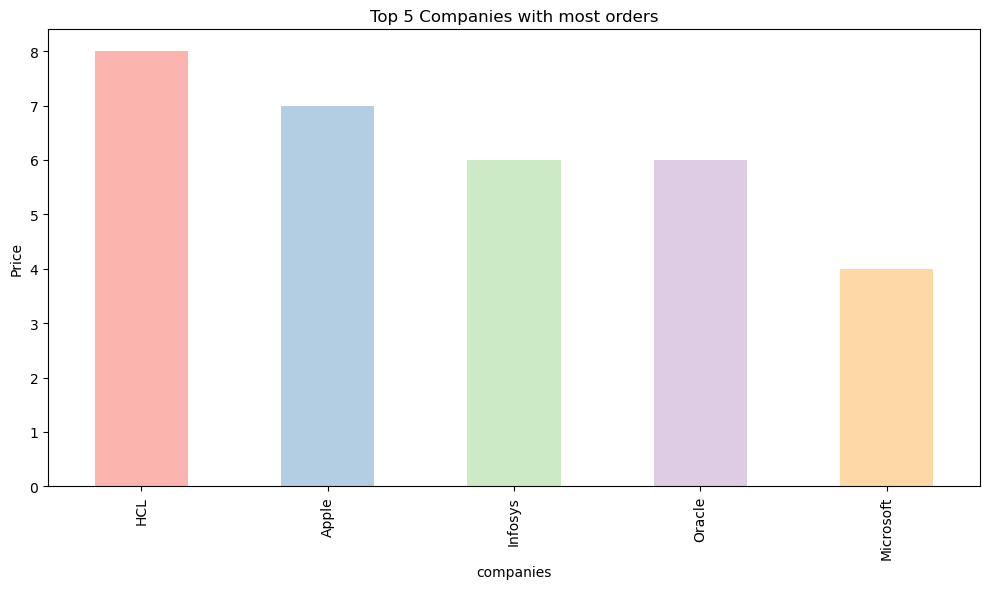

In [5]:
top_5 = (df.groupby('company-name')['total-quantity']
         .sum()
         .sort_values(ascending=False)
         .head(5)
        )
top_5.plot(kind='bar', figsize=(10, 6), color=pastel_colors)
plt.title('Top 5 Companies with most orders')
plt.xlabel('companies')
plt.ylabel('Price')
plt.xticks()
plt.tight_layout()
plt.show()

### Part 3
<b> Further, “Mr.Bean” has created a scatterplot showing total-quantity vs Price for  3 companies Apple, HCL and Infosys.

In [6]:
teddy = df[df['company-name'].isin(['Apple', 'HCL', 'Infosys'])]

apple = teddy[teddy['company-name'] == 'Apple']
hcl = teddy[teddy['company-name'] == 'HCL']
infosys = teddy[teddy['company-name'] == 'Infosys']

apple_agg = apple[['total-quantity', 'Price']].sum()
hcl_agg = hcl[['total-quantity', 'Price']].sum()

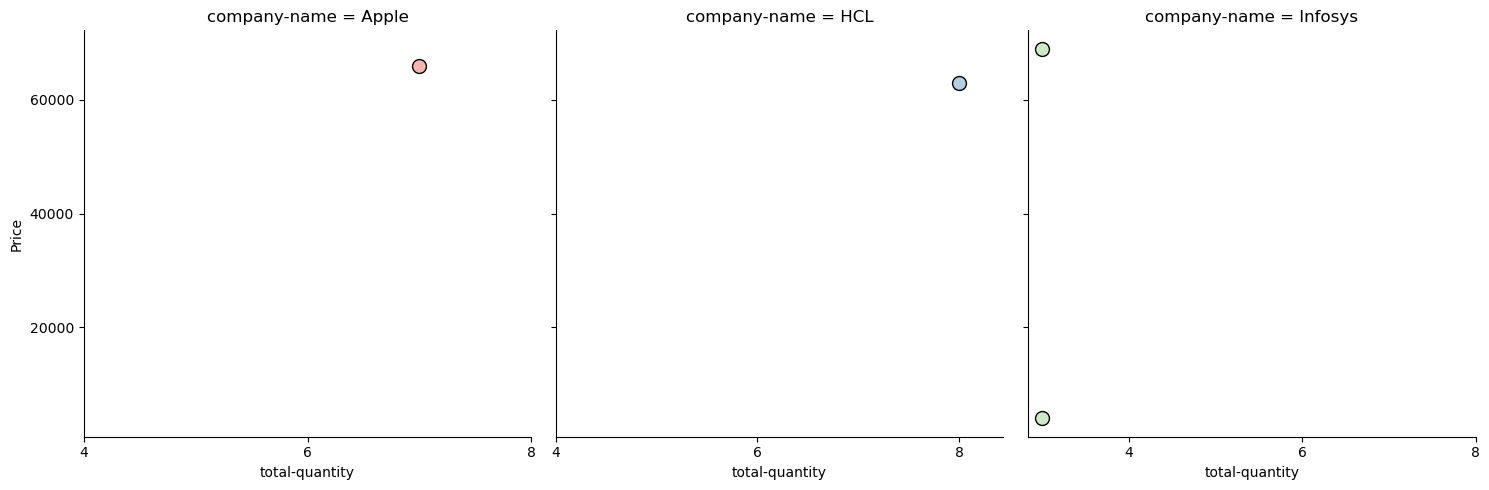

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Apple
axes[0].scatter(apple_agg['total-quantity'], 
                apple_agg['Price'], 
                color=pastel_colors[0], 
                edgecolor='black', s=100)
axes[0].set_title('company-name = Apple')
axes[0].set_xlabel('total-quantity')
axes[0].set_ylabel('Price')
axes[0].set_xticks([4, 6, 8])
axes[0].set_yticks([20000, 40000, 60000])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# HCL
axes[1].scatter(hcl_agg['total-quantity'], 
                hcl_agg['Price'], 
                color=pastel_colors[1], 
                edgecolor='black', s=100)
axes[1].set_title('company-name = HCL')
axes[1].set_xlabel('total-quantity')
axes[1].set_xticks([4, 6, 8])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Infosys
axes[2].scatter(infosys['total-quantity'], 
                infosys['Price'], 
                color=pastel_colors[2], 
                edgecolor='black', s=100)
axes[2].set_title('company-name = Infosys')
axes[2].set_xlabel('total-quantity')
axes[2].set_xticks([4, 6, 8])
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

***
***